In [283]:
import numpy as np
import matplotlib.pyplot as plt

### Load Near Field Data

Near field data is collected from planar surface with dimensions shown below

<image src="Scan Pattern.png" height=500>

In [284]:
x_points = 100 # Number of x positions on the plane
y_points = 100 # Number of y positions on the plane
a = 0.5        # x length of the plane
b = 0.5        # y length of the plane
freq = 10e9    # Frequency data was collected at

filename = 'near_field.nfd'

Read Data

In [285]:
Ex = np.zeros((x_points, y_points), dtype="complex")
Ey = np.zeros((x_points, y_points), dtype="complex")
Ez = np.zeros((x_points, y_points), dtype="complex")

x_i = 0
y_i = 0
with open(filename) as nfd_file:
    for line in nfd_file:
        comma_split = line.split(",")
        if (comma_split[0].isdigit()):
            Ex[x_i, y_i] = float(comma_split[4]) + 1j*float(comma_split[5])
            Ey[x_i, y_i] = float(comma_split[6]) + 1j*float(comma_split[7])
            Ez[x_i, y_i] = float(comma_split[8]) + 1j*float(comma_split[9])
            y_i += 1
            if (y_i == y_points):
                x_i += 1
                y_i = 0
            if (x_i == x_points):
                break

Plot Data

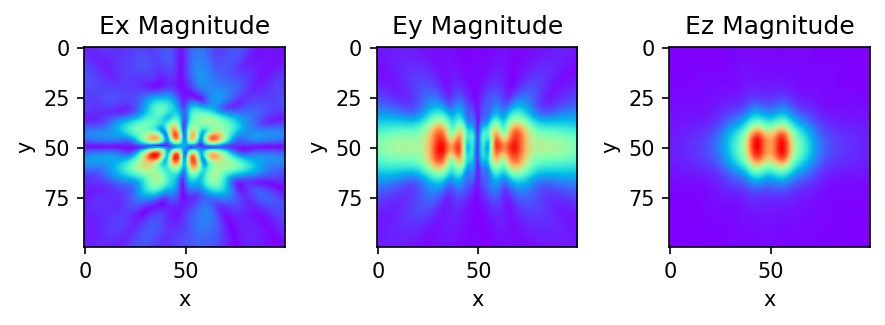

In [286]:
plt.figure(dpi=150)
plt.subplot(1, 3, 1)
plt.imshow(np.abs(Ex), cmap=plt.cm.rainbow)
plt.xlabel("x")
plt.ylabel("y")
plt.title("Ex Magnitude")
plt.subplot(1, 3, 2)
plt.imshow(np.abs(Ey), cmap=plt.cm.rainbow)
plt.xlabel("x")
plt.ylabel("y")
plt.title("Ey Magnitude")
plt.subplot(1, 3, 3)
plt.imshow(np.abs(Ez), cmap=plt.cm.rainbow)
plt.xlabel("x")
plt.ylabel("y")
plt.title("Ez Magnitude")
plt.tight_layout()

### Compute Plane Wave Spectrum

Spectrum is computed via a 2D FFT for each of the x,y,z components. fftshift ensures that zero frequency occurs in the center.

In [287]:
fx = np.fft.fftshift(np.fft.fft2(Ex))
fy = np.fft.fftshift(np.fft.fft2(Ey))
fz = np.fft.fftshift(np.fft.fft2(Ez))

Plot spectrum

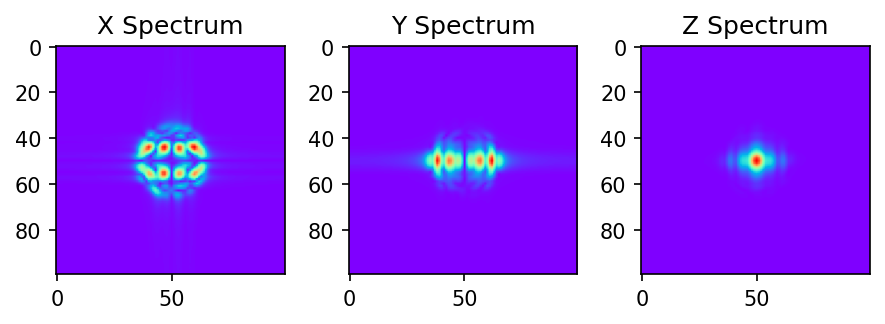

In [288]:
plt.figure(dpi=150)
plt.subplot(1, 3, 1)
plt.imshow(np.abs(fx), cmap=plt.cm.rainbow)
plt.title("X Spectrum")
plt.subplot(1, 3, 2)
plt.imshow(np.abs(fy), cmap=plt.cm.rainbow)
plt.title("Y Spectrum")
plt.subplot(1, 3, 3)
plt.imshow(np.abs(fz), cmap=plt.cm.rainbow)
plt.title("Z Spectrum")
plt.tight_layout()

### Compute Far Field

Returns magnitude E field for given r, theta, phi assuming far field.

In [289]:
def E_field(r, theta, phi, k, f, res_x, res_y):
    k1 = int(k*np.sin(theta)*np.cos(phi)/res_x) + 50
    k2 = int(k*np.sin(theta)*np.sin(phi)/res_y) + 50
    return 1j*k*np.exp(-1j*k*r)/(2*np.pi*r)*(np.cos(theta)*(f[k1, k2]))

Compute Ez far field for $-\pi/2 < \theta < \pi/2$

In [290]:
k = 2*np.pi*freq/(3e8) # Free space wavenumber
res_x = 2 * np.pi / a  # Kx resolution
res_y = 2 * np.pi / b  # Ky resolution

# Angles to try
steps = 100
thetas = np.linspace(-np.pi/2,np.pi/2,steps)

i = 0
E_field_z = np.zeros(steps, dtype="complex")
for theta in thetas:
    E_field_z[i] = E_field(1000, theta, 0, k, fz, res_x, res_y)
    i+=1

Plot results

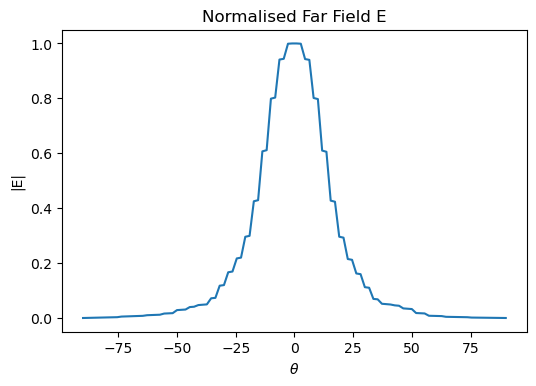

In [291]:
plt.figure(dpi=100)
plt.plot(np.rad2deg(thetas), np.abs(E_field_z)/np.max(np.abs(E_field_z)));
plt.xlabel("$\\theta$");
plt.ylabel("|E|");
plt.title("Normalised Far Field E");